# Bright Pixel

Skriv en tekst, som omsættes til et billede

## Opgave 1

* Sørg for at de korrekte nøgler er skrevet ind i .env filen.
* Indlæs miljøvariable (environment variables).


In [1]:
# Import namespaces
from dotenv import load_dotenv
import openai
import os
from uuid import uuid4
import urllib.request

# Set default save path
save_path = "./images/" # Ændre denne til den mappe du vil gemme billederne i

# Get Configuration Settings
load_dotenv()
openai_key = os.getenv('OPENAI_API_KEY')

# Configure openai
openai.api_key = openai_key

## Opgave 2

* Gennemlæs koden nedenunder, som kalder DALL-E API'et
* Tjek response-objektet. Undersøg de andre parametre i response-objektet
* Se hvor billedfilerne gemmes
    * Tjek navngivningen for billedet - hvorfor anvendes uuid?
* Test koden
* Justér på parametrene

In [2]:
# Create image function
def create_image(request, save=True):
    response = openai.Image.create(
        prompt=request,
        n=1,
        size="1024x1024"
    )
    image_url = response['data'][0]['url']
    full_save_path = save_path + f"openai_{uuid4()}.png"
    urllib.request.urlretrieve(image_url, full_save_path)
    print(f"\nImage created successfully! Saved to: {full_save_path}\n")
    return full_save_path

In [9]:
# Test koden
command = "A dog with a red collar is running through a field."
image_full_path = create_image(command)


Image created successfully! Saved to: ./images/openai_e272fa01-ae8a-46b1-9120-3043be57ad38.png



## Opgave 3

* Gennemlæse koden nedenunder, hvor al ovenstående kode samles

In [4]:
# Main function
def main():
    while True:
        print("Waiting for user input (write 'quit' to exit)...")
        request = input()
    
        if request == "quit":
            print("Exiting...")
            break

        # Create image
        create_image(request)  

# Run main
if __name__ == "__main__":
    main()

Waiting for user input (write 'quit' to exit)...
Exiting...


## Opgave 4

* Saml al kode i én fil
* Skriv filen til main.py
* Brug en terminal til at køre filen
* 

In [ ]:
# %%writefile main.py
# Sammensæt selv koden

# Ekstraopgave med billedanalyse (se kode under løsningsforslag)

* Brug Azure Computer Vision til at analysere billederne

# Løsningsforslag

In [ ]:
# %%writefile main.py

# Import namespaces
from dotenv import load_dotenv
import openai
import os
from uuid import uuid4
import urllib.request

# Set default save path
save_path = "./images/"

# Get Configuration Settings
load_dotenv()
openai_key = os.getenv('OPENAI_API_KEY')

# Configure openai
openai.api_key = openai_key

# Create image function
def create_image(request, save=True):
    response = openai.Image.create(
        prompt=request,
        n=1,
        size="1024x1024"
    )
    image_url = response['data'][0]['url']
    full_save_path = save_path + f"openai_{uuid4()}.jpg"
    urllib.request.urlretrieve(image_url, full_save_path)
    print(f"\nImage created successfully! Saved to: {full_save_path}\n")
    return full_save_path

# Main function
def main():
    while True:
        print("Waiting for user input (write 'quit' to exit)...")
        request = input()
    
        if request == "quit":
            print("Exiting...")
            break

        # Create image
        create_image(request)  

# Run main
if __name__ == "__main__":
    main()

# Image tagging

### Opgaver

* Indsæt environment variable
    * Spørg Jon, han vil fremsende keys
* Læs og forstå koden nedenunder
    * Et billede kan analyseres for mange ting: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.models.visualfeaturetypes?view=azure-python
* Indsæt stien til dit AI genererede billede
* Fjern udkommenteret kode, og undersøg billedet for nye features
* Sammensæt denne kode, med ovenstående kode, således at du kan generere et billede med tags og beskrivelse. Desuden skal det kun returneres, hvis det overholder rating politikker.

Analyzing ./images/openai_e272fa01-ae8a-46b1-9120-3043be57ad38.png
Description: 'a dog running through a field' (confidence: 60.60%)
Tags: 
 -'grass' (confidence: 99.98%)
 -'outdoor' (confidence: 99.95%)
 -'tree' (confidence: 99.88%)
 -'dog' (confidence: 99.86%)
 -'animal' (confidence: 95.81%)
 -'carnivore' (confidence: 95.20%)
 -'field' (confidence: 75.58%)
Categories:
 -'outdoor_field' (confidence: 41.41%)
Objects in image:
 -hound (confidence: 59.80%)
  Results saved in images/output_openai_e272fa01-ae8a-46b1-9120-3043be57ad38.png
Ratings:
 -Adult: False
 -Racy: False
 -Gore: False


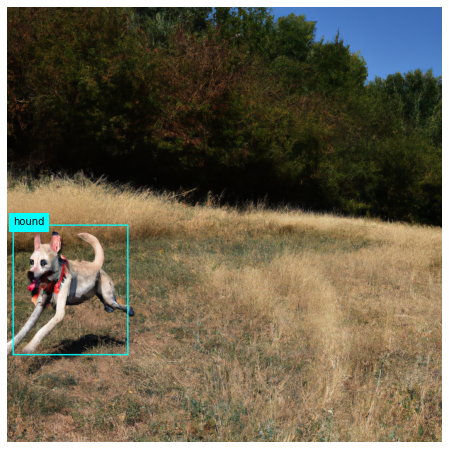

In [11]:
from dotenv import load_dotenv
import os
from array import array
from PIL import Image, ImageDraw
import sys
import time
from matplotlib import pyplot as plt
import numpy as np

# import namespaces
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

# Get Configuration Settings
load_dotenv()
cov_endpoint = os.getenv('AZURE_COV_ENDPOINT')
cov_key = os.getenv('AZURE_COV_KEY')

def main():
    global cv_client

    # Get image - Insert your own image here from your local images folder, with AI generated images
    if image_full_path:
        image_file = image_full_path
    else:
        image_file = 'images/openai_ab70064f-43f8-4e5b-880b-5db63d58ccdb.png'

    # Authenticate Computer Vision client
    credential = CognitiveServicesCredentials(cov_key) 
    cv_client = ComputerVisionClient(cov_endpoint, credential)

    # Analyze image
    AnalyzeImage(image_file)


def AnalyzeImage(image_file):
    print('Analyzing', image_file)

    # Specify features to be retrieved
    features = [VisualFeatureTypes.description,
                VisualFeatureTypes.tags,
                VisualFeatureTypes.categories,
                VisualFeatureTypes.brands,
                VisualFeatureTypes.objects,
                VisualFeatureTypes.adult]
    
    
    # Get image analysis
    with open(image_file, mode="rb") as image_data:
        analysis = cv_client.analyze_image_in_stream(image_data , features)

    #========= Get image description =========
    for caption in analysis.description.captions:
        print("Description: '{}' (confidence: {:.2f}%)".format(caption.text, caption.confidence * 100))

    #========= Get image tags =========
    if (len(analysis.tags) > 0):
        print("Tags: ")
        for tag in analysis.tags:
            print(" -'{}' (confidence: {:.2f}%)".format(tag.name, tag.confidence * 100))

    #========= Get image categories =========
    if (len(analysis.categories) > 0):
        print("Categories:")
        landmarks = []
        for category in analysis.categories:
            # Print the category
            print(" -'{}' (confidence: {:.2f}%)".format(category.name, category.score * 100))
            if category.detail:
                # Get landmarks in this category
                if category.detail.landmarks:
                    for landmark in category.detail.landmarks:
                        if landmark not in landmarks:
                            landmarks.append(landmark)

        # If there were landmarks, list them
        if len(landmarks) > 0:
            print("Landmarks:")
            for landmark in landmarks:
                print(" -'{}' (confidence: {:.2f}%)".format(landmark.name, landmark.confidence * 100))


    # ========= Get brands in the image =========
    if (len(analysis.brands) > 0):
        print("Brands: ")
        for brand in analysis.brands:
            print(" -'{}' (confidence: {:.2f}%)".format(brand.name, brand.confidence * 100))

    #========= Get objects in the image =========
    if len(analysis.objects) > 0:
        print("Objects in image:")

        # Prepare image for drawing
        fig = plt.figure(figsize=(8, 8))
        plt.axis('off')
        image = Image.open(image_file)
        draw = ImageDraw.Draw(image)
        color = 'cyan'
        for detected_object in analysis.objects:
            # Print object name
            print(" -{} (confidence: {:.2f}%)".format(detected_object.object_property, detected_object.confidence * 100))
            
            # Draw object bounding box
            r = detected_object.rectangle
            bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
            draw.rectangle(bounding_box, outline=color, width=3)
            plt.annotate(detected_object.object_property,(r.x, r.y), backgroundcolor=color)
        # Save annotated image
        plt.imshow(image)
        basename_image_file = os.path.basename(image_file)

        outputfile = f'images/output_{basename_image_file}'
        fig.savefig(outputfile)
        print('  Results saved in', outputfile)

    #========= Get moderation ratings =========
    ratings = 'Ratings:\n -Adult: {}\n -Racy: {}\n -Gore: {}'.format(analysis.adult.is_adult_content,
                                                                        analysis.adult.is_racy_content,
                                                                        analysis.adult.is_gory_content)
    print(ratings)


if __name__ == "__main__":
    main()
